In [1]:
import scipy.io
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# plt.style.use('seaborn-whitegrid')
import torch
import torchaudio

In [2]:
import os
dirname = os.path.abspath('')
rootdir = os.path.split(dirname)[0]

H1_TRAINING_INPUT_PATH = "".join([rootdir, "/data/train/ht1-input.wav"])
H1_TRAINING_TARGET_PATH = "".join([rootdir, "/data/train/ht1-target.wav"])

H1_LSTM_OUTPUT_PATH = "".join([rootdir, "/output/lstm_mlp_premp_filter_mse_h1.wav"])

In [3]:
MUFF_LSTM_TARGET_PATH = "".join([rootdir, "/data/train/muff-target.wav"])
MUFF_LSTM_OUTPUT_PATH = "".join([rootdir, "/output/lstm_mlp_premp_filter_mse_muff.wav"])

In [4]:
train_target, fs = torchaudio.load(MUFF_LSTM_TARGET_PATH)
train_output, fs = torchaudio.load(MUFF_LSTM_OUTPUT_PATH)


target_data = train_target.numpy().reshape(-1)
output_data = train_output.numpy().reshape(-1)

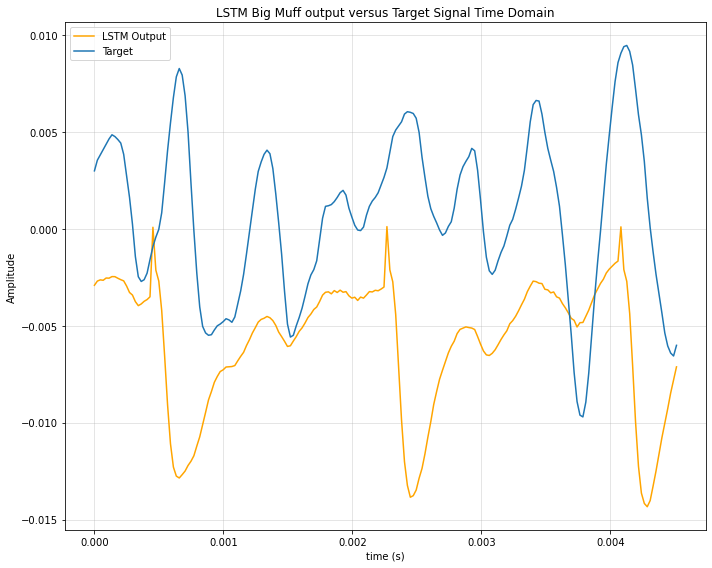

In [5]:
nn_out = output_data[44100*3:44100*3+200]
target = target_data[44100*3:44100*3+200]

sample_rate = 44100

num_frames = nn_out.shape[0]
time_axis = np.arange(0, num_frames) / sample_rate

plt.figure(figsize=(10,8))
plt.plot(time_axis, nn_out, c='orange',linewidth=1.5)
plt.plot(time_axis, target,linewidth=1.5)
plt.grid(alpha=0.4)
plt.ylabel('Amplitude')
plt.xlabel('time (s)')
plt.title(r'LSTM Big Muff output versus Target Signal Time Domain')
plt.legend(['LSTM Output', 'Target'])
plt.tight_layout()
plt.savefig('lstm_waveform_big_muff_cmp_nnout_target.png', dpi=150)

In [6]:
def plot_waveform(waveform, sample_rate, title="Waveform of Target Output Big Muff", xlim=None, ylim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(num_channels, num_frames +1) / sample_rate

    figure, axes = plt.subplots(1, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
    if num_channels > 1:
        axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
        axes[c].set_xlim(xlim)
    if ylim:
        axes[c].set_ylim(ylim)
    figure.suptitle(title)
    plt.ylabel('Amplitude')
    plt.xlabel('time (s)')
    plt.grid(alpha=0.4)
#     plt.savefig('Waveform_of_output_5_seconds.png', dpi=150)
    plt.show(block=False)



In [7]:
def plot_specgram(waveform, sample_rate, title="Spectrogram of Big Muff distorted Signal", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(1, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
        axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
        axes[c].set_xlim(xlim)
    figure.suptitle(title, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.ylabel('Frequency', fontsize=18)
    plt.xlabel('Time', fontsize=18)
    plt.tight_layout()
    plt.savefig(f'{title}.png', dpi=150)
    plt.show(block=False)

In [8]:
train_target.shape

torch.Size([1, 14994001])

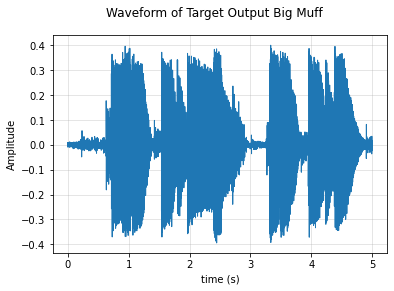

In [9]:
plot_waveform(train_target[:,3*44100:44100*3 + 44100*5], 44100)

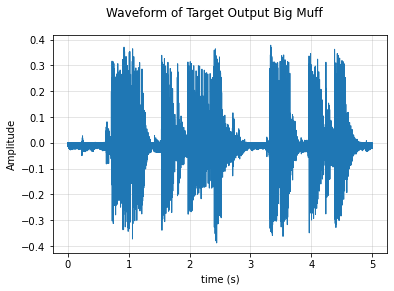

In [10]:
plot_waveform(train_output[:,3*44100:44100*3 + 44100*5], 44100)

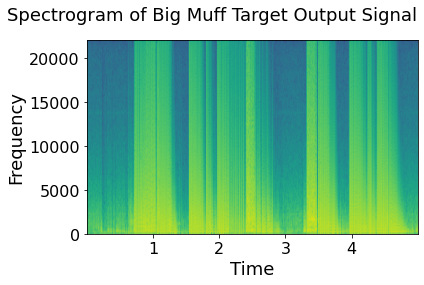

In [11]:
plot_specgram(train_target[:,3*44100:44100*3 + 44100*5], 44100, title="Spectrogram of Big Muff Target Output Signal", xlim=None)

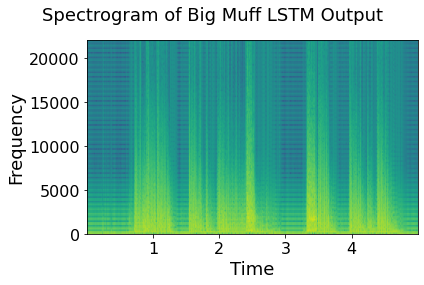

In [12]:
plot_specgram(train_output[:,3*44100:44100*3 + 44100*5], 44100, title="Spectrogram of Big Muff LSTM Output", xlim=None)

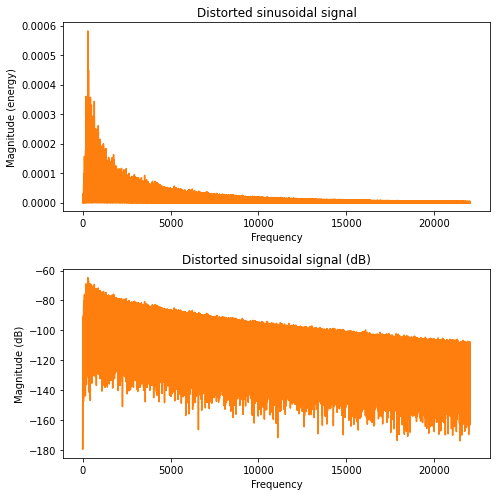

In [13]:
Fs = 44100
dt = 1/Fs
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.title("Distorted sinusoidal signal")
plt.magnitude_spectrum(target_data, Fs=1 / dt, color='C1')

plt.subplot(2,1,2)
plt.title("Distorted sinusoidal signal (dB)")
plt.magnitude_spectrum(target_data, Fs=Fs, scale='dB', color='C1')

plt.tight_layout()
# plt.savefig('FIRNN_pure_sinusoidal_signal_spectrums.png', dpi=150)
plt.show()

In [ ]:
Fs = 44100
dt = 1/Fs
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.title("LSTM Big Muff Magnitude Spectrum")
plt.magnitude_spectrum(output_data, Fs=1 / dt, color='C1')

plt.subplot(2,1,2)
plt.title("LSTM Big Muff Magnitude Spectrum (dB)")
plt.magnitude_spectrum(output_data, Fs=Fs, scale='dB', color='C1')

plt.tight_layout()
# plt.savefig('FIRNN_pure_sinusoidal_signal_spectrums.png', dpi=150)
plt.show()